

* **Company** - *String* - Laptop Manufacturer
* **Product** - *String* - Brand and Model
* **TypeName** - *String* - Type (Notebook, Ultrabook, Gaming, etc.)
* **Inches** - *Numeric* - Screen Size
* **ScreenResolution** - *String* - Screen Resolution
* **Cpu** - *String* - Central Processing Unit (CPU)
* **Ram** - *String* - Laptop RAM
* **Memory** - *String* - Hard Disk / SSD Memory
* **GPU** - *String* - Graphics Processing Units (GPU)
* **OpSys** - *String* - Operating System
* **Weight** - *String* - Laptop Weight
* **Price_euros** - *Numeric* - Price (Euro)


In [1]:
import numpy as np 
import pandas as pd 
import re

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 16, 10 

In [3]:
from sklearn.feature_extraction import DictVectorizer

In [4]:
!ls

Dockerfile              any_row_for_checking.py notebook.ipynb
Pipfile                 common_function.py      predict.py
Pipfile.lock            laptop_dv.pkl           requests_to_docker.py
README.md               laptop_model_1_0.pkl    train.py
__pycache__             laptop_price.csv


In [5]:
df = pd.read_csv('laptop_price.csv', encoding = "ISO-8859-1")
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


## preparation dataset to one style

In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['laptop_id', 'company', 'product', 'typename', 'inches',
       'screenresolution', 'cpu', 'ram', 'memory', 'gpu', 'opsys', 'weight',
       'price_euros'],
      dtype='object')

In [8]:
# drop `laptop_id`
df = df.drop('laptop_id', axis=1)
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [9]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower()
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
0,apple,macbook pro,ultrabook,13.3,ips panel retina display 2560x1600,intel core i5 2.3ghz,8gb,128gb ssd,intel iris plus graphics 640,macos,1.37kg,1339.69
1,apple,macbook air,ultrabook,13.3,1440x900,intel core i5 1.8ghz,8gb,128gb flash storage,intel hd graphics 6000,macos,1.34kg,898.94
2,hp,250 g6,notebook,15.6,full hd 1920x1080,intel core i5 7200u 2.5ghz,8gb,256gb ssd,intel hd graphics 620,no os,1.86kg,575.00
3,apple,macbook pro,ultrabook,15.4,ips panel retina display 2880x1800,intel core i7 2.7ghz,16gb,512gb ssd,amd radeon pro 455,macos,1.83kg,2537.45
4,apple,macbook pro,ultrabook,13.3,ips panel retina display 2560x1600,intel core i5 3.1ghz,8gb,256gb ssd,intel iris plus graphics 650,macos,1.37kg,1803.60


## EDA

In [10]:
# Check missing values.
df.isnull().sum()

company             0
product             0
typename            0
inches              0
screenresolution    0
cpu                 0
ram                 0
memory              0
gpu                 0
opsys               0
weight              0
price_euros         0
dtype: int64

In [11]:
# check on duplicates on all columns
df[df.duplicated(keep=False)].sort_values('product')

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
1287,hp,15-ac110nv (i7-6500u/6gb/1tb/radeon,notebook,15.6,1366x768,intel core i7 6500u 2.5ghz,6gb,1tb hdd,amd radeon r5 m330,windows 10,2.19kg,764.00
1301,hp,15-ac110nv (i7-6500u/6gb/1tb/radeon,notebook,15.6,1366x768,intel core i7 6500u 2.5ghz,6gb,1tb hdd,amd radeon r5 m330,windows 10,2.19kg,764.00
1273,hp,15-ac110nv (i7-6500u/6gb/1tb/radeon,notebook,15.6,1366x768,intel core i7 6500u 2.5ghz,6gb,1tb hdd,amd radeon r5 m330,windows 10,2.19kg,764.00
1263,acer,aspire es1-531,notebook,15.6,1366x768,intel celeron dual core n3060 1.6ghz,4gb,500gb hdd,intel hd graphics 400,linux,2.4kg,289.00
1291,acer,aspire es1-531,notebook,15.6,1366x768,intel celeron dual core n3060 1.6ghz,4gb,500gb hdd,intel hd graphics 400,linux,2.4kg,289.00
1277,acer,aspire es1-531,notebook,15.6,1366x768,intel celeron dual core n3060 1.6ghz,4gb,500gb hdd,intel hd graphics 400,linux,2.4kg,289.00
1300,lenovo,ideapad 100s-14ibr,notebook,14.0,1366x768,intel celeron dual core n3050 1.6ghz,2gb,64gb flash storage,intel hd graphics,windows 10,1.5kg,229.00
1272,lenovo,ideapad 100s-14ibr,notebook,14.0,1366x768,intel celeron dual core n3050 1.6ghz,2gb,64gb flash storage,intel hd graphics,windows 10,1.5kg,229.00
1286,lenovo,ideapad 100s-14ibr,notebook,14.0,1366x768,intel celeron dual core n3050 1.6ghz,2gb,64gb flash storage,intel hd graphics,windows 10,1.5kg,229.00
1265,lenovo,ideapad y700-15isk,notebook,15.6,ips panel full hd 1920x1080,intel core i7 6700hq 2.6ghz,8gb,1tb hdd,nvidia geforce gtx 960m,windows 10,2.6kg,899.00


In [12]:
# drop duplicates
print('shape before drop_duplicates =', df.shape)
df = df.drop_duplicates(keep='first')
print('shape after drop_duplicates =', df.shape)

shape before drop_duplicates = (1303, 12)
shape after drop_duplicates = (1275, 12)


In [13]:
# we need check situation when we have the same characteristics, but price isn`t the same.
print('shape before drop_duplicates =', df.shape)
columns_without_price = df.columns.drop('price_euros')
df = df.drop_duplicates(columns_without_price, keep='first')
print('shape after drop_duplicates =', df.shape)
df = df.reset_index(drop=True)
df.head()

shape before drop_duplicates = (1275, 12)
shape after drop_duplicates = (1250, 12)


,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
0,apple,macbook pro,ultrabook,13.3,ips panel retina display 2560x1600,intel core i5 2.3ghz,8gb,128gb ssd,intel iris plus graphics 640,macos,1.37kg,1339.69
1,apple,macbook air,ultrabook,13.3,1440x900,intel core i5 1.8ghz,8gb,128gb flash storage,intel hd graphics 6000,macos,1.34kg,898.94
2,hp,250 g6,notebook,15.6,full hd 1920x1080,intel core i5 7200u 2.5ghz,8gb,256gb ssd,intel hd graphics 620,no os,1.86kg,575.00
3,apple,macbook pro,ultrabook,15.4,ips panel retina display 2880x1800,intel core i7 2.7ghz,16gb,512gb ssd,amd radeon pro 455,macos,1.83kg,2537.45
4,apple,macbook pro,ultrabook,13.3,ips panel retina display 2560x1600,intel core i5 3.1ghz,8gb,256gb ssd,intel iris plus graphics 650,macos,1.37kg,1803.60


In [14]:
# Count unique number for each categorical features.
df[categorical_columns].nunique()

company              19
product             576
typename              6
screenresolution     40
cpu                 116
ram                   9
memory               39
gpu                 110
opsys                 9
weight              179
dtype: int64

In [15]:
print(df.shape[0])
(df[categorical_columns].nunique() / len(df) * 100).round(2)

1250


company              1.52
product             46.08
typename             0.48
screenresolution     3.20
cpu                  9.28
ram                  0.72
memory               3.12
gpu                  8.80
opsys                0.72
weight              14.32
dtype: float64

Rows count in our dataset `df` are 1303. We can see that `product` has big percent unique values. We will delete their.

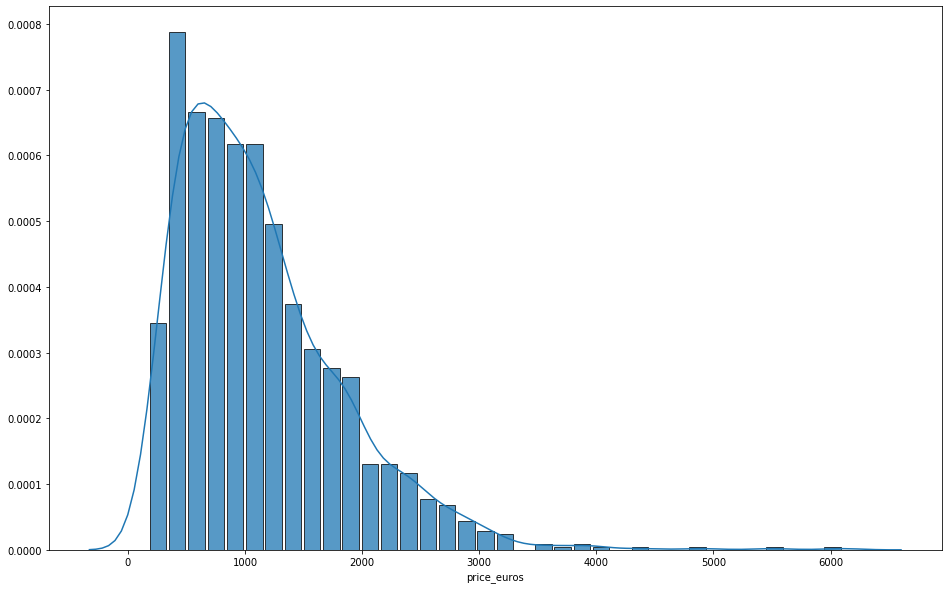

In [16]:
sns.distplot(df['price_euros'], hist_kws={'rwidth':0.85, 'edgecolor':'black', 'alpha':0.75});

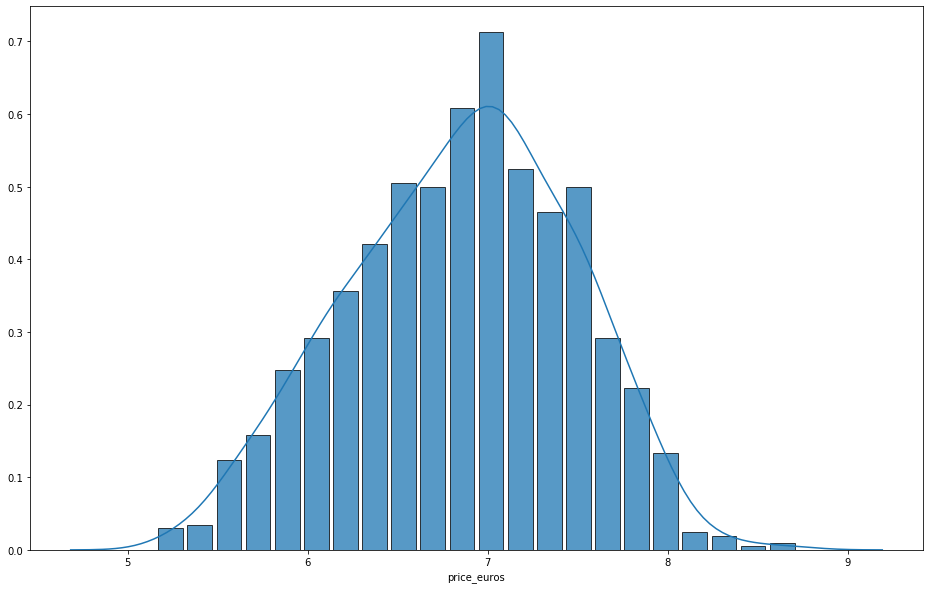

In [17]:
sns.distplot(np.log(df['price_euros']), hist_kws={'rwidth':0.85, 'edgecolor':'black', 'alpha':0.75});

In [18]:
np.percentile(df['price_euros'].values, 95)

2449.0

In [19]:
df = df[df.price_euros < np.percentile(df['price_euros'].values, 95)]

Transform our target columns.

In [20]:
df['log_price'] = np.log(df['price_euros'])

notebook              687
ultrabook             180
gaming                168
2 in 1 convertible    104
netbook                23
workstation            22
Name: typename, dtype: int64


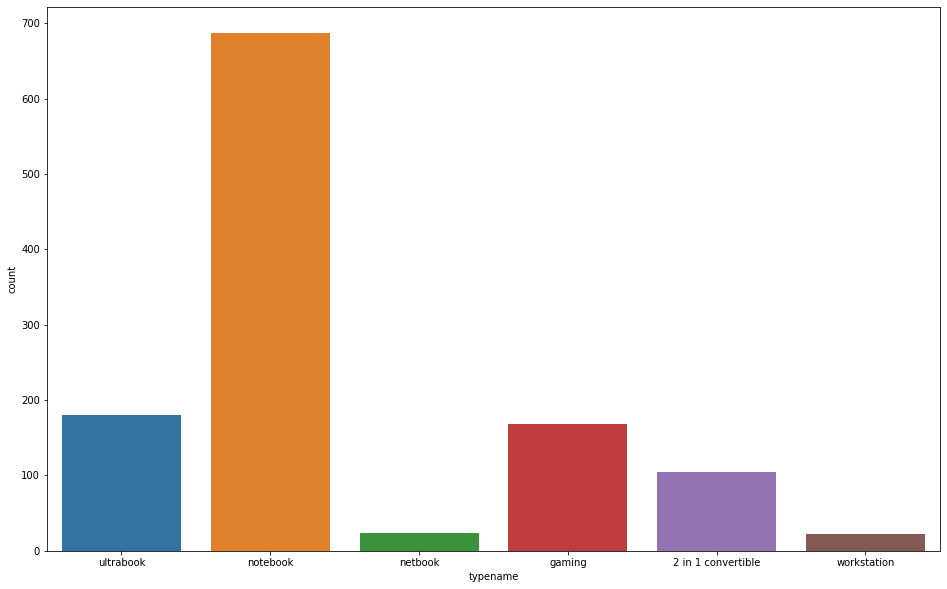

In [21]:
print(df['typename'].value_counts())
sns.countplot(x='typename', data=df);

lenovo       263
dell         260
hp           258
asus         146
acer          99
msi           48
toshiba       46
apple         19
samsung        9
mediacom       7
microsoft      5
xiaomi         4
vero           4
chuwi          3
google         3
fujitsu        3
lg             3
huawei         2
razer          2
Name: company, dtype: int64


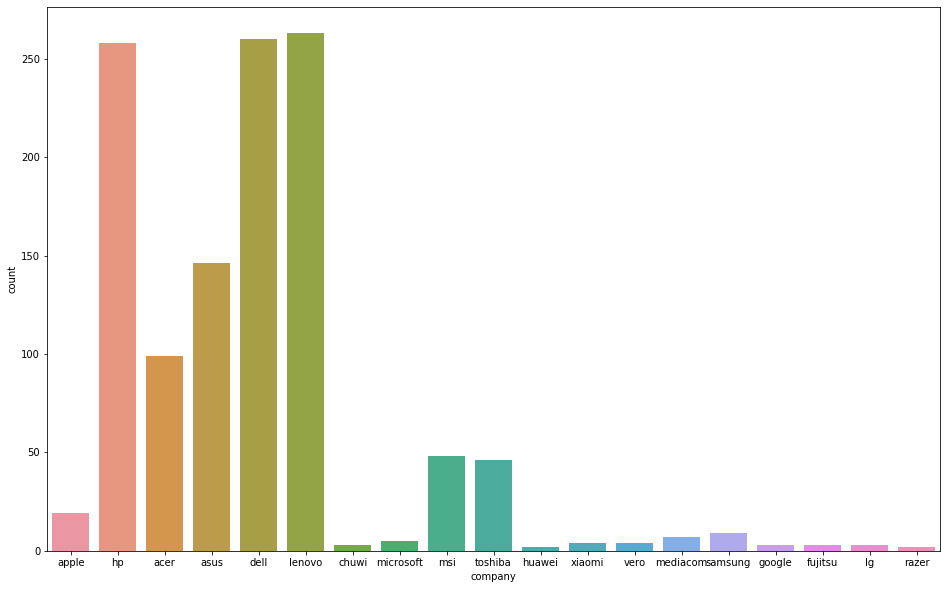

In [22]:
print(df['company'].value_counts())
sns.countplot(x='company', data=df);

We have a few `company`, that meets very rarely.

Delete `company` with lower counts in datasets.

In [23]:
th_hold = 6
reraly_company = df['company'].value_counts()[(df['company'].value_counts() < th_hold)].keys()
for company in reraly_company:
    df = df[df['company'] != company]

In [24]:
df['company'].value_counts()

lenovo      263
dell        260
hp          258
asus        146
acer         99
msi          48
toshiba      46
apple        19
samsung       9
mediacom      7
Name: company, dtype: int64

### RAM

8gb     576
4gb     354
16gb    150
6gb      32
12gb     25
2gb      15
24gb      2
32gb      1
Name: ram, dtype: int64


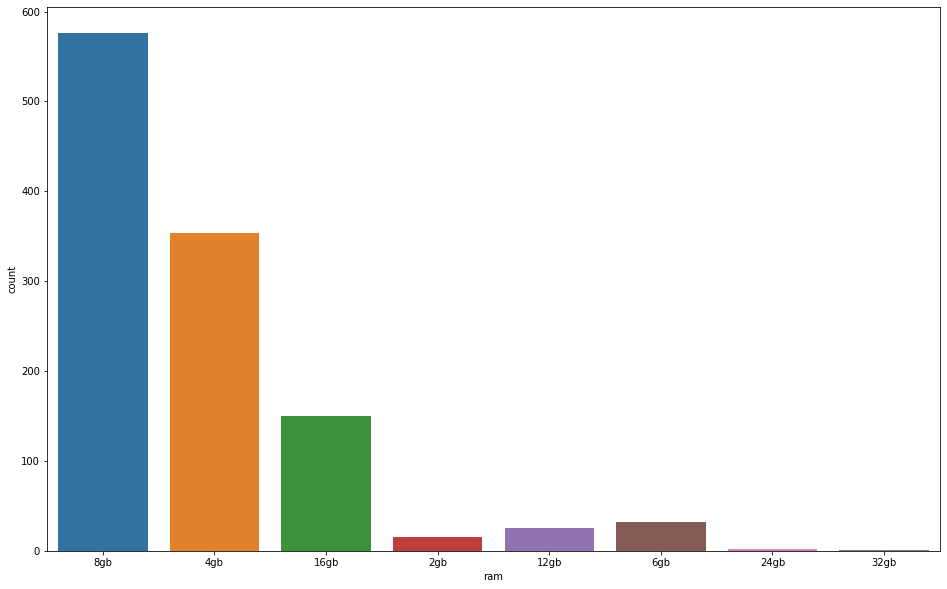

In [25]:
print(df['ram'].value_counts())
sns.countplot(x='ram', data=df);

We have a few `ram`, that meets very rarely.

Delete `ram` with lower counts in datasets.

In [26]:
df = df[df['ram'] != '64gb']
df = df[df['ram'] != '24gb']

windows 10      948
no os            63
linux            57
windows 7        39
chrome os        24
macos            11
mac os x          8
windows 10 s      2
android           1
Name: opsys, dtype: int64


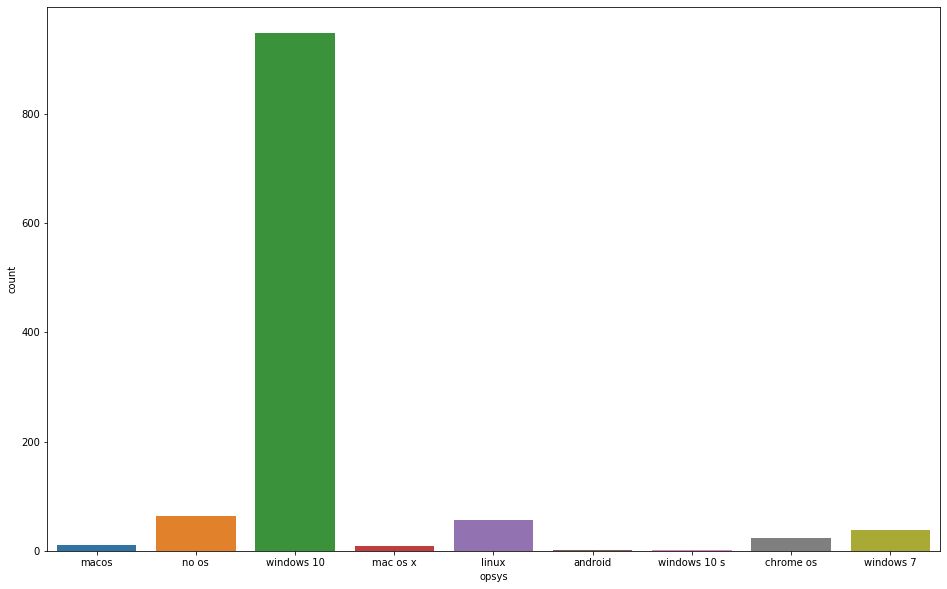

In [27]:
print(df['opsys'].value_counts())
sns.countplot(x='opsys', data=df);

Delete `opsys` with rarely counts in datasets and replace `mac os x` to `macos`,  `windows 10 s` to `windows 10 s`, because they are very similar. 

In [28]:
df = df[df['opsys'] != 'android']


df['opsys'] = df['opsys'].str.replace('mac os x', 'macos')
df['opsys'] = df['opsys'].str.replace('windows 10 s', 'windows 10')

## Feature generation

In [29]:
# convert `weight` to numerical values.
df.loc[:, 'weight'] = df.loc[:, 'weight'].apply(lambda x: float(x[:-2]))
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros,log_price
0,apple,macbook pro,ultrabook,13.3,ips panel retina display 2560x1600,intel core i5 2.3ghz,8gb,128gb ssd,intel iris plus graphics 640,macos,1.37,1339.69,7.200194
1,apple,macbook air,ultrabook,13.3,1440x900,intel core i5 1.8ghz,8gb,128gb flash storage,intel hd graphics 6000,macos,1.34,898.94,6.801216
2,hp,250 g6,notebook,15.6,full hd 1920x1080,intel core i5 7200u 2.5ghz,8gb,256gb ssd,intel hd graphics 620,no os,1.86,575.00,6.354370
4,apple,macbook pro,ultrabook,13.3,ips panel retina display 2560x1600,intel core i5 3.1ghz,8gb,256gb ssd,intel iris plus graphics 650,macos,1.37,1803.60,7.497540
5,acer,aspire 3,notebook,15.6,1366x768,amd a9-series 9420 3ghz,4gb,500gb hdd,amd radeon r5,windows 10,2.10,400.00,5.991465


In [30]:
def split_resolution(x):
    width = int(x.split('x')[0])
    height = int(x.split('x')[1])
    return [width, height]

### screenresolution

Lets extract resolution from `screenresolution`.

In [31]:
# lets extract resolution from `screenresolution`.
df['resolution'] = df['screenresolution'].str.extract(r'(\d+x\d+)')
df['screenresolution'] = df['screenresolution'].replace(r'(\d+x\d+)', '', regex=True)
df['width'] = df['resolution'].apply(lambda x: split_resolution(x)[0])
df['height'] = df['resolution'].apply(lambda x: split_resolution(x)[1])

In [32]:
df['screenresolution'].value_counts()

full hd                                 474
                                        287
ips panel full hd                       200
ips panel full hd / touchscreen          45
full hd / touchscreen                    44
touchscreen                              19
ips panel retina display                 14
quad hd+ / touchscreen                   14
ips panel touchscreen                    10
ips panel                                 8
ips panel 4k ultra hd / touchscreen       7
4k ultra hd                               5
ips panel 4k ultra hd                     5
ips panel quad hd+                        5
4k ultra hd / touchscreen                 4
ips panel quad hd+ / touchscreen          4
quad hd+                                  3
ips panel touchscreen / 4k ultra hd       2
touchscreen / quad hd+                    1
touchscreen / full hd                     1
Name: screenresolution, dtype: int64

In [33]:
df['touchscreen'] = (df['screenresolution'].str.extract(r'(touchscreen)') == 'touchscreen').astype(int)
df['ips'] = (df['screenresolution'].str.extract(r'(ips)') == 'ips').astype(int)
df['full_hd'] = (df['screenresolution'].str.extract(r'(full hd)') == 'full hd').astype(int)
df['4k_ultra_hd'] = (df['screenresolution'].str.extract(r'(4k ultra hd)') == '4k ultra hd').astype(int)
df['quad_hd'] = (df['screenresolution'].str.extract(r'(quad hd+)') == 'quad hd').astype(int)

In [34]:
df[['touchscreen', 'ips', 'full_hd', '4k_ultra_hd', 'quad_hd']].sum()

touchscreen    151
ips            300
full_hd        764
4k_ultra_hd     23
quad_hd         27
dtype: int64

In [35]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,...,price_euros,log_price,resolution,width,height,touchscreen,ips,full_hd,4k_ultra_hd,quad_hd
0,apple,macbook pro,ultrabook,13.3,ips panel retina display,intel core i5 2.3ghz,8gb,128gb ssd,intel iris plus graphics 640,macos,...,1339.69,7.200194,2560x1600,2560,1600,0,1,0,0,0
1,apple,macbook air,ultrabook,13.3,,intel core i5 1.8ghz,8gb,128gb flash storage,intel hd graphics 6000,macos,...,898.94,6.801216,1440x900,1440,900,0,0,0,0,0
2,hp,250 g6,notebook,15.6,full hd,intel core i5 7200u 2.5ghz,8gb,256gb ssd,intel hd graphics 620,no os,...,575.00,6.354370,1920x1080,1920,1080,0,0,1,0,0
4,apple,macbook pro,ultrabook,13.3,ips panel retina display,intel core i5 3.1ghz,8gb,256gb ssd,intel iris plus graphics 650,macos,...,1803.60,7.497540,2560x1600,2560,1600,0,1,0,0,0
5,acer,aspire 3,notebook,15.6,,amd a9-series 9420 3ghz,4gb,500gb hdd,amd radeon r5,windows 10,...,400.00,5.991465,1366x768,1366,768,0,0,0,0,0


### CPU

In [36]:
df['ghz'] = df['cpu'].str.extract(r'(\d+(?:\.\d+)?ghz)') 
df['ghz'] = df['ghz'].apply(lambda x: x[:-3]).astype(float)
df['cpu'] = df['cpu'].replace(r'(\d+(?:\.\d+)?ghz)', '', regex=True)

In [37]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,...,log_price,resolution,width,height,touchscreen,ips,full_hd,4k_ultra_hd,quad_hd,ghz
0,apple,macbook pro,ultrabook,13.3,ips panel retina display,intel core i5,8gb,128gb ssd,intel iris plus graphics 640,macos,...,7.200194,2560x1600,2560,1600,0,1,0,0,0,2.3
1,apple,macbook air,ultrabook,13.3,,intel core i5,8gb,128gb flash storage,intel hd graphics 6000,macos,...,6.801216,1440x900,1440,900,0,0,0,0,0,1.8
2,hp,250 g6,notebook,15.6,full hd,intel core i5 7200u,8gb,256gb ssd,intel hd graphics 620,no os,...,6.354370,1920x1080,1920,1080,0,0,1,0,0,2.5
4,apple,macbook pro,ultrabook,13.3,ips panel retina display,intel core i5,8gb,256gb ssd,intel iris plus graphics 650,macos,...,7.497540,2560x1600,2560,1600,0,1,0,0,0,3.1
5,acer,aspire 3,notebook,15.6,,amd a9-series 9420,4gb,500gb hdd,amd radeon r5,windows 10,...,5.991465,1366x768,1366,768,0,0,0,0,0,3.0


In [38]:
def extract_brand(x):
    return x.split(' ')[0]

In [39]:
df['cpu'].apply(lambda x: extract_brand(x)).value_counts()

intel      1092
amd          59
samsung       1
Name: cpu, dtype: int64

Delete `samsung` cpu brand with lower counts in datasets.

In [40]:
df = df[~df['cpu'].str.startswith('samsung')]

In [41]:
df['cpu_intel'] = (df['cpu'].str.extract(r'(intel)') == 'intel').astype(int)
df['cpu_amd'] = (df['cpu'].str.extract(r'(amd)') == 'amd').astype(int)

### GPU

In [42]:
df['gpu'].apply(lambda x: extract_brand(x)).value_counts()

intel     648
nvidia    339
amd       164
Name: gpu, dtype: int64

In [43]:
df['gpu_intel'] = (df['gpu'].str.extract(r'(intel)') == 'intel').astype(int)
df['gpu_nvidia'] = (df['gpu'].str.extract(r'(nvidia)') == 'nvidia').astype(int)
df['gpu_amd'] = (df['gpu'].str.extract(r'(amd)') == 'amd').astype(int)

In [44]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,...,ips,full_hd,4k_ultra_hd,quad_hd,ghz,cpu_intel,cpu_amd,gpu_intel,gpu_nvidia,gpu_amd
0,apple,macbook pro,ultrabook,13.3,ips panel retina display,intel core i5,8gb,128gb ssd,intel iris plus graphics 640,macos,...,1,0,0,0,2.3,1,0,1,0,0
1,apple,macbook air,ultrabook,13.3,,intel core i5,8gb,128gb flash storage,intel hd graphics 6000,macos,...,0,0,0,0,1.8,1,0,1,0,0
2,hp,250 g6,notebook,15.6,full hd,intel core i5 7200u,8gb,256gb ssd,intel hd graphics 620,no os,...,0,1,0,0,2.5,1,0,1,0,0
4,apple,macbook pro,ultrabook,13.3,ips panel retina display,intel core i5,8gb,256gb ssd,intel iris plus graphics 650,macos,...,1,0,0,0,3.1,1,0,1,0,0
5,acer,aspire 3,notebook,15.6,,amd a9-series 9420,4gb,500gb hdd,amd radeon r5,windows 10,...,0,0,0,0,3.0,0,1,0,0,1


### memory

In [45]:
df['memory'].value_counts()

256gb ssd                        377
1tb hdd                          212
500gb hdd                        122
128gb ssd +  1tb hdd              90
512gb ssd                         89
128gb ssd                         71
256gb ssd +  1tb hdd              59
32gb flash storage                31
2tb hdd                           16
256gb flash storage                8
16gb flash storage                 7
64gb flash storage                 7
256gb ssd +  2tb hdd               7
1.0tb hybrid                       7
512gb ssd +  1tb hdd               6
32gb ssd                           6
180gb ssd                          5
128gb flash storage                4
1tb ssd                            4
16gb ssd                           3
512gb flash storage                2
256gb ssd +  500gb hdd             2
128gb ssd +  2tb hdd               2
256gb ssd +  256gb ssd             2
512gb ssd +  2tb hdd               2
64gb ssd                           1
508gb hybrid                       1
8

Extracy type of memory.

In [46]:
df['memory_ssd'] = (df['memory'].str.extract(r'(ssd)') == 'ssd').astype(int)
df['memory_hdd'] = (df['memory'].str.extract(r'(hdd)') == 'hdd').astype(int)
df['memory_flash'] = (df['memory'].str.extract(r'(flash storage)') == 'flash storage').astype(int)

In [47]:
def split_memory(x, type_memory):
    """
    x: str
    type_memory: str
    
    split `str` by "+"
    and extract storege size for each type_memory 
    """
    
    res = x.split('+')
    
    ssd_value = 0
    hdd_value = 0
    flash_value = 0 
    for _ in res:
        
        count_gb = int(re.findall(r'\d+', _)[0])
        if 'tb' in _:
            count_gb = count_gb * 1024
        
        if 'ssd' in _:
            ssd_value += count_gb
        elif 'hdd' in _:
            hdd_value += count_gb
        else:
            flash_value += count_gb
            
    if type_memory == 'ssd':
        return ssd_value
    elif type_memory == 'hdd':
        return hdd_value
    else:
        return flash_value

In [48]:
df['ssd_value'] = df['memory'].apply(lambda x: split_memory(x, 'ssd'))
df['hdd_value'] = df['memory'].apply(lambda x: split_memory(x, 'hdd'))
df['flash_value'] = df['memory'].apply(lambda x: split_memory(x, 'flash'))

In [49]:
df.head(10)

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,...,cpu_amd,gpu_intel,gpu_nvidia,gpu_amd,memory_ssd,memory_hdd,memory_flash,ssd_value,hdd_value,flash_value
0,apple,macbook pro,ultrabook,13.3,ips panel retina display,intel core i5,8gb,128gb ssd,intel iris plus graphics 640,macos,...,0,1,0,0,1,0,0,128,0,0
1,apple,macbook air,ultrabook,13.3,,intel core i5,8gb,128gb flash storage,intel hd graphics 6000,macos,...,0,1,0,0,0,0,1,0,0,128
2,hp,250 g6,notebook,15.6,full hd,intel core i5 7200u,8gb,256gb ssd,intel hd graphics 620,no os,...,0,1,0,0,1,0,0,256,0,0
4,apple,macbook pro,ultrabook,13.3,ips panel retina display,intel core i5,8gb,256gb ssd,intel iris plus graphics 650,macos,...,0,1,0,0,1,0,0,256,0,0
5,acer,aspire 3,notebook,15.6,,amd a9-series 9420,4gb,500gb hdd,amd radeon r5,windows 10,...,1,0,0,1,0,1,0,0,500,0
6,apple,macbook pro,ultrabook,15.4,ips panel retina display,intel core i7,16gb,256gb flash storage,intel iris pro graphics,macos,...,0,1,0,0,0,0,1,0,0,256
7,apple,macbook air,ultrabook,13.3,,intel core i5,8gb,256gb flash storage,intel hd graphics 6000,macos,...,0,1,0,0,0,0,1,0,0,256
8,asus,zenbook ux430un,ultrabook,14.0,full hd,intel core i7 8550u,16gb,512gb ssd,nvidia geforce mx150,windows 10,...,0,0,1,0,1,0,0,512,0,0
9,acer,swift 3,ultrabook,14.0,ips panel full hd,intel core i5 8250u,8gb,256gb ssd,intel uhd graphics 620,windows 10,...,0,1,0,0,1,0,0,256,0,0
10,hp,250 g6,notebook,15.6,,intel core i5 7200u,4gb,500gb hdd,intel hd graphics 620,no os,...,0,1,0,0,0,1,0,0,500,0


Drop unnessery columns.

In [50]:
df.columns

Index(['company', 'product', 'typename', 'inches', 'screenresolution', 'cpu',
       'ram', 'memory', 'gpu', 'opsys', 'weight', 'price_euros', 'log_price',
       'resolution', 'width', 'height', 'touchscreen', 'ips', 'full_hd',
       '4k_ultra_hd', 'quad_hd', 'ghz', 'cpu_intel', 'cpu_amd', 'gpu_intel',
       'gpu_nvidia', 'gpu_amd', 'memory_ssd', 'memory_hdd', 'memory_flash',
       'ssd_value', 'hdd_value', 'flash_value'],
      dtype='object')

In [51]:
df = df.drop(['product', 'screenresolution', 'cpu', 'gpu', 'memory', 'resolution'], axis=1)
df.head()

,company,typename,inches,ram,opsys,weight,price_euros,log_price,width,height,...,cpu_amd,gpu_intel,gpu_nvidia,gpu_amd,memory_ssd,memory_hdd,memory_flash,ssd_value,hdd_value,flash_value
0,apple,ultrabook,13.3,8gb,macos,1.37,1339.69,7.200194,2560,1600,...,0,1,0,0,1,0,0,128,0,0
1,apple,ultrabook,13.3,8gb,macos,1.34,898.94,6.801216,1440,900,...,0,1,0,0,0,0,1,0,0,128
2,hp,notebook,15.6,8gb,no os,1.86,575.00,6.354370,1920,1080,...,0,1,0,0,1,0,0,256,0,0
4,apple,ultrabook,13.3,8gb,macos,1.37,1803.60,7.497540,2560,1600,...,0,1,0,0,1,0,0,256,0,0
5,acer,notebook,15.6,4gb,windows 10,2.10,400.00,5.991465,1366,768,...,1,0,0,1,0,1,0,0,500,0


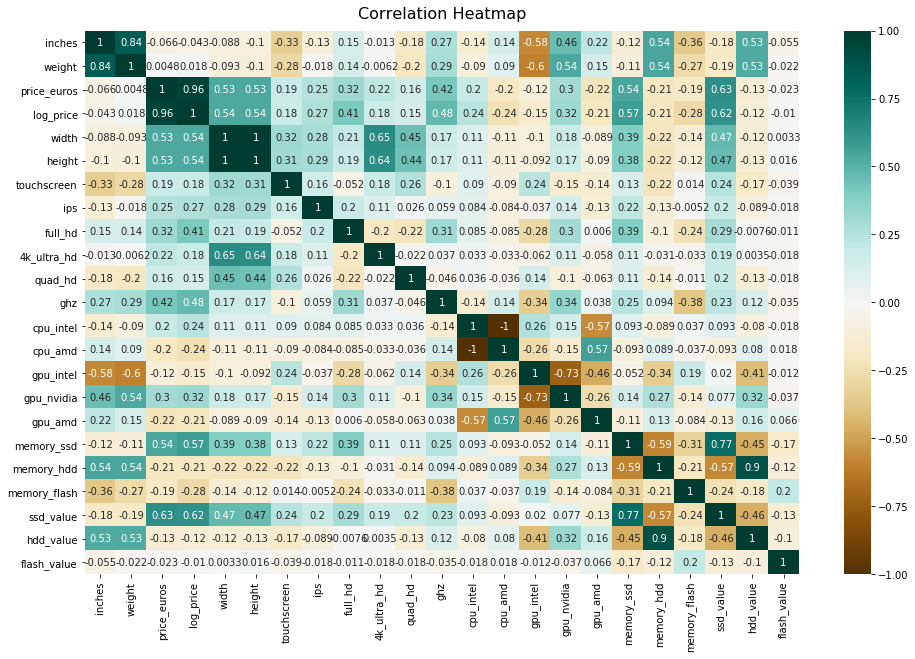

In [52]:
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12);

In [53]:
df.shape

(1151, 27)

## BUILD MODELS

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

import sklearn


import xgboost as xgb

Split our data to train and test.

I doesn't use validation dataset, because I will use another technick for validation. 

In [55]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=7)

In [56]:
y_train = df_train[['price_euros', 'log_price']]
y_test = df_test[['price_euros', 'log_price']]

df_train = df_train.drop(['price_euros', 'log_price'], axis=1)
df_test = df_test.drop(['price_euros', 'log_price'], axis=1)

In [57]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

In [58]:
# sorted(sklearn.metrics.SCORERS.keys())

## RandomForestRegressor

In [59]:
rf = RandomForestRegressor(random_state=7, n_jobs=-1)

Use `KFold` and `GridSearchCV` for tuning hyperparameters for RandomForestRegressor

In [60]:
folds = KFold(n_splits=5, shuffle=True, random_state=7)

parameters = {'n_estimators':[50, 100, 150, 200, 250], 'max_depth':[3, 4, 5, 6, 7, 8, 9, 10],
             'max_features': ["auto", "sqrt", "log2"]}


model_rf = GridSearchCV(rf, 
                        param_grid=parameters, 
                        scoring='neg_mean_absolute_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True, 
                        n_jobs=-1)

In [61]:
model_rf.fit(X_train, y_train['log_price'].values.ravel())

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.0min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
             estimator=RandomForestRegressor(n_jobs=-1, random_state=7),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200, 250]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [62]:
model_rf.best_score_

-0.17064405538322197

In [63]:
model_rf.best_params_

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200}

In [64]:
rf = RandomForestRegressor(n_estimators=200, max_depth=10, max_features='auto', random_state=7, n_jobs=-1)

rf.fit(X_train, y_train['log_price'].values.ravel())
y_pred_rf = rf.predict(X_test)

In [65]:
mean_absolute_error(y_test['log_price'].values.ravel(), y_pred_rf).round(3)

0.158

In [66]:
y_test['y_pred_rf'] = y_pred_rf
y_test['y_pred_rf_price'] = np.exp(y_test['y_pred_rf'])
y_test['abs_error_rf'] = abs(y_test['price_euros'] - y_test['y_pred_rf_price'])
y_test.sort_values('abs_error_rf', ascending=False).head(20)

,price_euros,log_price,y_pred_rf,y_pred_rf_price,abs_error_rf
448,2046.00,7.623642,6.839073,933.623015,1112.376985
456,2090.00,7.644919,6.971083,1065.375447,1024.624553
884,1962.99,7.582224,6.973263,1067.701215,895.288785
1103,1895.00,7.546974,7.084806,1193.691691,701.308309
468,2408.00,7.786552,7.456713,1731.447598,676.552402
819,2419.00,7.791110,7.470160,1754.886900,664.113100
242,1079.00,6.983790,7.424728,1676.943637,597.943637
526,1649.00,7.407924,6.962821,1056.609920,592.390080
770,2299.00,7.740230,7.464102,1744.289318,554.710682
1133,2299.00,7.740230,7.475985,1765.138739,533.861261


In [67]:
round(np.mean(y_test['abs_error_rf']), 3), round(np.median(y_test['abs_error_rf']), 3)

(155.966, 105.222)

In [68]:
y_test['abs_error_rf'].describe()

count     231.000000
mean      155.965544
std       170.872928
min         0.281379
25%        46.942767
50%       105.221873
75%       200.118830
max      1112.376985
Name: abs_error_rf, dtype: float64

In [69]:
sorted(list(zip(rf.feature_importances_, dv.feature_names_)), key=lambda x: x[0], reverse=True)

[(0.28777771711723604, 'ram=4gb'),
 (0.10790713262257455, 'ghz'),
 (0.10532645040017381, 'ssd_value'),
 (0.08441525075458918, 'typename=notebook'),
 (0.08392279516530968, 'width'),
 (0.08193346686206814, 'height'),
 (0.053815869819595796, 'weight'),
 (0.03218758606196432, 'ram=16gb'),
 (0.02376756808856164, 'inches'),
 (0.014559038194093384, 'ram=2gb'),
 (0.009041434478445586, 'memory_ssd'),
 (0.007712066951843902, 'opsys=no os'),
 (0.007137472418415129, 'company=hp'),
 (0.0067803210907473824, 'typename=workstation'),
 (0.006187514164537864, 'ips'),
 (0.0058315183037280826, 'ram=6gb'),
 (0.005637727829143424, 'cpu_intel'),
 (0.005457880222796267, 'hdd_value'),
 (0.005392386907740117, 'company=dell'),
 (0.005053743568074851, 'cpu_amd'),
 (0.0049795383025134825, 'opsys=windows 10'),
 (0.004962436117807828, 'company=asus'),
 (0.004404738139711463, 'ram=8gb'),
 (0.004077088827528152, 'company=acer'),
 (0.004018604950350569, 'touchscreen'),
 (0.0036810697891173326, 'opsys=windows 7'),
 (0.0

## XGBRegressor

In [70]:
from xgboost import XGBRegressor

In [71]:
model = XGBRegressor(n_estimators=100, max_depth=5, objective='reg:squarederror')

In [72]:
folds = KFold(n_splits=3, shuffle=True, random_state=7)

parameters = {'n_estimators': [150, 200, 250], 
              'max_depth': [4, 5, 6], 
              'learning_rate': [0.1, 0.01],
              'colsample_bytree': [0.5], 
              'subsample': [0.6], 
             'eta': [.3, .2, .1, .05, .01, .005]}

model_xgb = GridSearchCV(model, 
                        param_grid=parameters, 
                        scoring='neg_mean_absolute_error', 
                        cv=folds, 
                        verbose=1,
                        return_train_score=True, n_jobs=-1)

In [73]:
model_xgb.fit(X_train, y_train['log_price'].values.ravel())

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:   21.1s finished


GridSearchCV(cv=KFold(n_splits=3, random_state=7, shuffle=True),
             estimator=XGBRegressor(max_depth=5, objective='reg:squarederror'),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5],
                         'eta': [0.3, 0.2, 0.1, 0.05, 0.01, 0.005],
                         'learning_rate': [0.1, 0.01], 'max_depth': [4, 5, 6],
                         'n_estimators': [150, 200, 250], 'subsample': [0.6]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [74]:
model_xgb.best_params_

{'colsample_bytree': 0.5,
 'eta': 0.3,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 250,
 'subsample': 0.6}

In [75]:
model = XGBRegressor(n_estimators=250, max_depth=5, objective='reg:squarederror',
                    learning_rate=0.1, subsample=0.6, colsample_bytree=0.5, eta=0.3)

In [76]:
model.fit(X_train, y_train['log_price'].values.ravel())

XGBRegressor(colsample_bytree=0.5, eta=0.3, max_depth=5, n_estimators=250,
             objective='reg:squarederror', subsample=0.6)

In [77]:
y_hat = model.predict(X_test)

In [78]:
mean_absolute_error(y_test['log_price'].values.ravel(), y_hat).round(3)

0.134

In [79]:
y_test['y_pred_xgb'] = y_hat
y_test['y_pred_xgb_price'] = np.exp(y_test['y_pred_xgb'])
y_test['abs_error_xgb'] = abs(y_test['price_euros'] - y_test['y_pred_xgb_price'])
y_test.sort_values('abs_error_xgb', ascending=False).head(20)

,price_euros,log_price,y_pred_rf,y_pred_rf_price,abs_error_rf,y_pred_xgb,y_pred_xgb_price,abs_error_xgb
456,2090.00,7.644919,6.971083,1065.375447,1024.624553,6.913440,1005.701233,1084.298767
448,2046.00,7.623642,6.839073,933.623015,1112.376985,7.153486,1278.555542,767.444458
884,1962.99,7.582224,6.973263,1067.701215,895.288785,7.157595,1283.819214,679.170786
1059,1399.00,7.243513,7.488920,1788.120304,389.120304,7.623388,2045.479980,646.479980
1103,1895.00,7.546974,7.084806,1193.691691,701.308309,7.130795,1249.870728,645.129272
819,2419.00,7.791110,7.470160,1754.886900,664.113100,7.494076,1797.363525,621.636475
242,1079.00,6.983790,7.424728,1676.943637,597.943637,7.435147,1694.507324,615.507324
526,1649.00,7.407924,6.962821,1056.609920,592.390080,7.023564,1122.780884,526.219116
770,2299.00,7.740230,7.464102,1744.289318,554.710682,7.495455,1799.843994,499.156006
935,1899.00,7.549083,7.284490,1457.517592,441.482408,7.261932,1425.007568,473.992432


In [80]:
round(np.mean(y_test['abs_error_xgb']), 3),  round(np.median(y_test['abs_error_xgb']), 3)

(138.788, 98.704)